<a href="https://colab.research.google.com/github/sudal13/coad/blob/main/22_ML_coding_%E1%84%92%E1%85%A1%E1%86%A8%E1%84%89%E1%85%A2%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML practice
@author: Sang Wouk Cho

# Import necessary libraries

In [1]:
# 데이터 처리 및 시각화 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [2]:
# 주요 분류 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# 모델 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
# 모델 라이브러리 - Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#  클러스터링 알고리즘
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Load dataset

In [5]:
# Load dataset
data = pd.read_csv('22.student-mat.csv', sep=';') # 빈칸

Variables in the Dataset (33 Features)

Personal and Demographic Information

 1. school: Student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira).
 2. sex: Gender (binary: ‘F’ - female or ‘M’ - male).
 3. age: Age of the student (numeric: 15-22).
 4. address: Home location (binary: ‘U’ - urban or ‘R’ - rural).
 5. famsize: Family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3).
 6. Pstatus: Parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart).

Parental Information

 7. Medu: Mother’s education (numeric: 0 - none to 4 - higher education).
 8. Fedu: Father’s education (numeric: 0 - none to 4 - higher education).
 9. Mjob: Mother’s job (nominal: ‘teacher’, ‘health’, ‘services’, ‘at_home’, or ‘other’).
 10. Fjob: Father’s job (nominal: ‘teacher’, ‘health’, ‘services’, ‘at_home’, or ‘other’).
 11. reason: Reason for choosing this school (nominal: ‘home’, ‘reputation’, ‘course’, ‘other’).
 12. guardian: Student’s guardian (nominal: ‘mother’, ‘father’, or ‘other’).

Academic and School-Related Information

 13. traveltime: Travel time to school (numeric: 1 - <15 min, 2 - 15 to 30 min, 3 - 30 to 60 min, or 4 - >60 min).
 14. studytime: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).
 15. failures: Number of past class failures (numeric: 0-4).
 16. schoolsup: Extra educational support (binary: ‘yes’ or ‘no’).
 17. famsup: Family educational support (binary: ‘yes’ or ‘no’).
 18. paid: Extra paid classes within the course subject (binary: ‘yes’ or ‘no’).
 19. activities: Extra-curricular activities (binary: ‘yes’ or ‘no’).
 20. nursery: Attended nursery school (binary: ‘yes’ or ‘no’).
 21. higher: Wants to take higher education (binary: ‘yes’ or ‘no’).
 22. internet: Internet access at home (binary: ‘yes’ or ‘no’).
 23. romantic: In a romantic relationship (binary: ‘yes’ or ‘no’).

Social and Family Context

 24. famrel: Quality of family relationships (numeric: 1 - very bad to 5 - excellent).
 25. freetime: Free time after school (numeric: 1 - very low to 5 - very high).
 26. goout: Going out with friends (numeric: 1 - very low to 5 - very high).
 27. Dalc: Workday alcohol consumption (numeric: 1 - very low to 5 - very high).
 28. Walc: Weekend alcohol consumption (numeric: 1 - very low to 5 - very high).
 29. health: Current health status (numeric: 1 - very bad to 5 - very good).

Performance and Outcomes

 30. absences: Number of school absences (numeric: 0-93).
 31. G1: First-period grade (numeric: 0-20).
 32. G2: Second-period grade (numeric: 0-20).
 33. G3: Final grade (numeric: 0-20).

## Data explore

### Basic information

In [6]:
# 데이터 기본 구조 확인
print(data.head())  # 상위 5개 행 출력
print(data.info())  # 데이터 타입 및 결측치 확인
print(data.describe())  # 수치형 변수 통계 요약

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

### Categorical variables

In [7]:
# 각 변수의 고유값 확인
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


### Missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


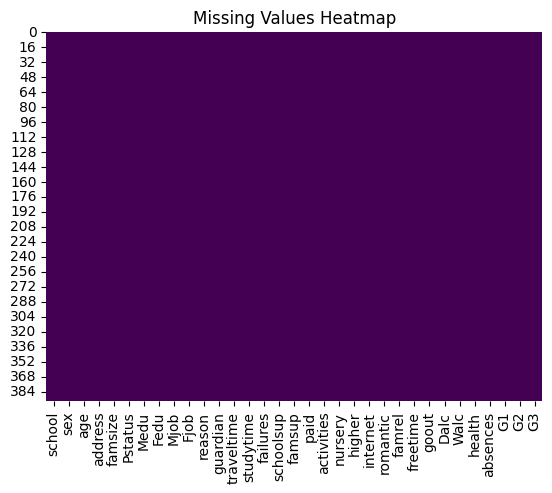

In [8]:
# 결측치 개수 확인
print(data.isnull().sum())

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### Distribution of variables

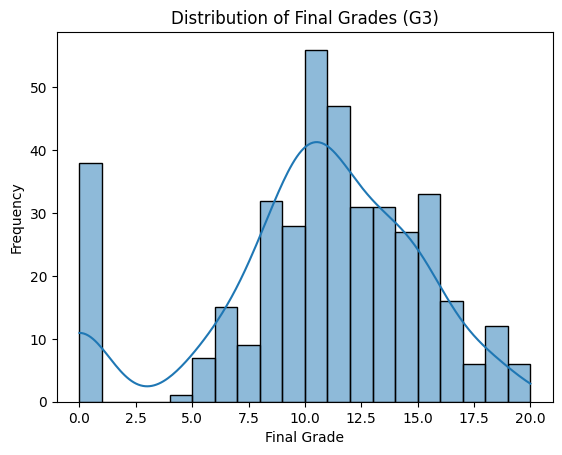

In [9]:
# G3 (Final Grade) 분포 확인
sns.histplot(data['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

### Relationship between variables

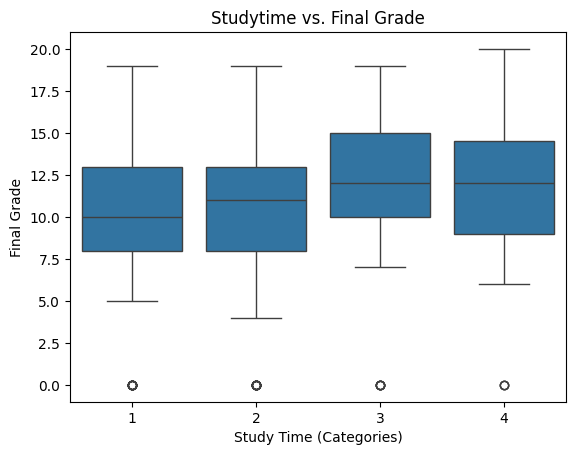

In [10]:
# Studytime과 G3 관계 시각화
sns.boxplot(x='studytime', y='G3', data=data)
plt.title("Studytime vs. Final Grade")
plt.xlabel("Study Time (Categories)")
plt.ylabel("Final Grade")
plt.show()

In [11]:
# 부모 학력과 G3의 평균 비교
parent_edu_g3 = data.groupby(['Medu', 'Fedu'])['G3'].mean().reset_index()
sns.heatmap(parent_edu_g3.pivot('Medu', 'Fedu', 'G3'), annot=True, cmap='viridis')
plt.title("Mean Final Grade by Parents' Education Levels")
plt.xlabel("Father's Education Level")
plt.ylabel("Mother's Education Level")
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

### Correlation

In [19]:
data_ = data.select_dtypes(include=['int64'])
# 상관행렬 계산
correlation_matrix = data.corr()

# 상관행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# G3와 상관계수 출력 (정렬)
print(correlation_matrix['G3'].sort_values(ascending=False))

ValueError: could not convert string to float: 'GP'

# 1. Clustering Students into Performance Groups

Use clustering algorithms to group students based on their performance indicators (e.g., G1, G2, studytime, failures, absences, etc.) and behavioral attributes (e.g., goout, Dalc, Walc).

• Objective: Understand patterns in student behavior and performance to develop targeted interventions.

### Feature selection

In [14]:
# 클러스터링에 사용할 변수 (수치형 + 카테고리형 변수 포함)
clustering_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'sex', 'address', 'schoolsup']

# 카테고리형 변수를 원-핫 인코딩으로 변환
# sex, address, schoolsup 변수는 더미 변수(0/1)로 변환됨
data_encoded = pd.get_dummies(data[clustering_features], drop_first=True)

### Standardize the data

In [16]:
# 수치형 변수의 단위 차이를 제거하여 스케일을 맞춤
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded) # 빈칸

In [20]:
X_scaled

array([[-1.78246688, -1.25479105, -0.04228585, ..., -0.94817639,
         0.53539233,  2.59713266],
       [-1.78246688, -1.52097927, -0.04228585, ..., -0.94817639,
         0.53539233, -0.38504002],
       [-1.1791469 , -0.72241461, -0.04228585, ..., -0.94817639,
         0.53539233,  2.59713266],
       ...,
       [-0.27416693, -0.72241461, -1.23535078, ...,  1.05465609,
        -1.86778916, -0.38504002],
       [ 0.02749306,  0.34233827, -1.23535078, ...,  1.05465609,
        -1.86778916, -0.38504002],
       [-0.87748691, -0.45622639, -1.23535078, ...,  1.05465609,
         0.53539233, -0.38504002]])

### Elbow method

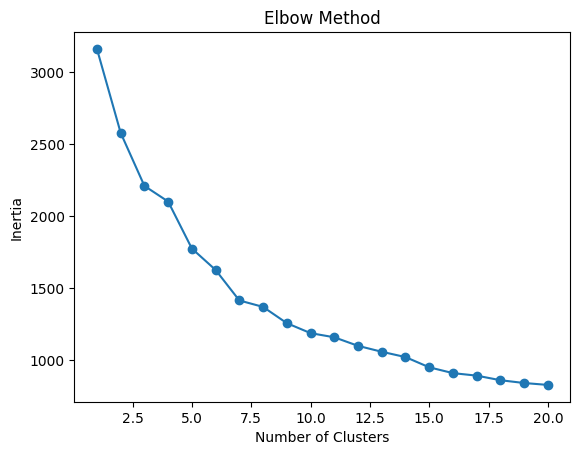

In [21]:

# 엘보우(Elbow) 기법을 사용하여 최적의 클러스터 수 결정
inertia = []  # 각 클러스터 수에 따른 관성값 저장
for k in range(1, 21):  # 클러스터 수를 1~10으로 설정
    kmeans = KMeans(n_clusters=k, random_state=6434)
    kmeans.fit(X_scaled) # 빈칸
    inertia.append(kmeans.inertia_)  # 각 k값에 대한 관성값 저장

# 엘보우 곡선 시각화
plt.plot(range(1, 21), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Select the best K-means result

In [22]:
# 최적의 클러스터 수를 설정하여 KMeans 모델 학습
optimal_k = 6 # 빈칸
kmeans = KMeans(n_clusters=optimal_k, random_state=6434)
clusters = kmeans.fit_predict(X_scaled) # 빈칸

In [23]:
# 클러스터 레이블을 원래 데이터에 추가
data['Cluster'] = clusters

In [24]:
# 클러스터가 추가된 데이터 일부 출력
data[['G1', 'G2', 'studytime', 'failures', 'absences', 'sex', 'address', 'schoolsup', 'Cluster']].head()

,G1,G2,studytime,failures,absences,sex,address,schoolsup,Cluster
0,5,6,2,0,6,F,U,yes,1
1,5,5,2,0,4,F,U,no,5
2,7,8,2,3,10,F,U,yes,1
3,15,14,3,0,2,F,U,no,0
4,6,10,2,0,4,F,U,no,5


In [27]:
data_ = data[['G1', 'G2', 'studytime', 'failures', 'absences', 'Cluster']]

### Visualization of Clusters

In [25]:
# 클러스터별 개수 출력
print("\nKMeans Cluster Counts:\n", data['Cluster'].value_counts())


KMeans Cluster Counts:
 Cluster
3    108
0     89
5     71
2     68
1     50
4      9
Name: count, dtype: int64


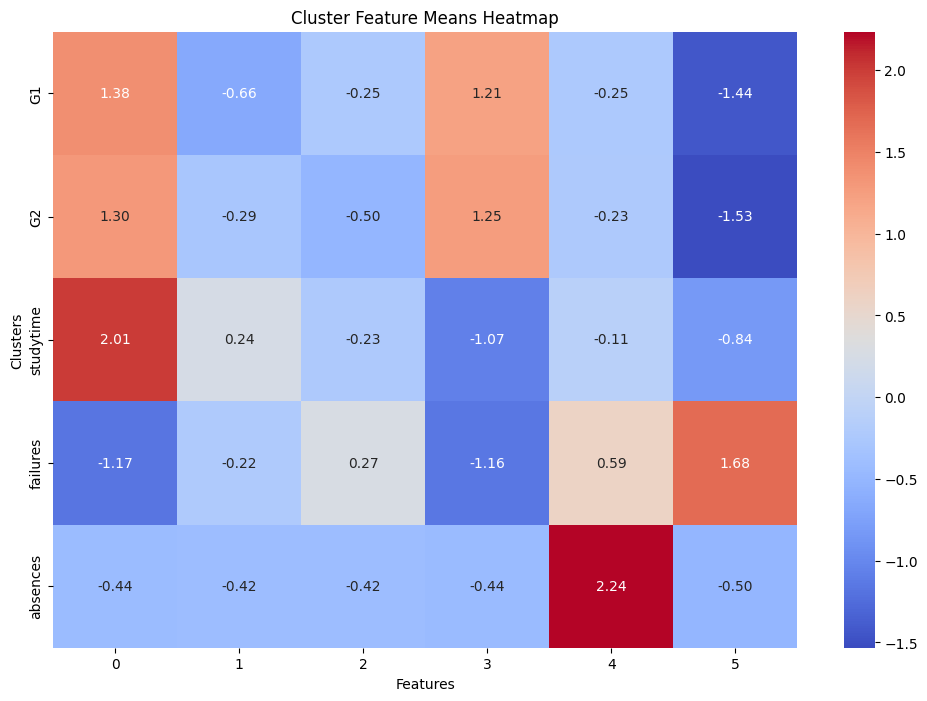

In [29]:
# Calculate cluster means
cluster_means = data_.groupby("Cluster").mean()

# Apply Min-Max Scaling to the calculated means
scaler = StandardScaler()
scaled_means = scaler.fit_transform(cluster_means)  # Scale cluster means
scaled_means_df = pd.DataFrame(scaled_means, index=cluster_means.index, columns=cluster_means.columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_means_df.T, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Cluster Feature Means Heatmap")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

# 2. Predicting Final Grades
Use the dataset to predict the final grade (G3) based on all the other features. This can help identify key factors that influence student performance and assist educators in providing targeted support.

- Input (Features): All features except G3.
- Output (Target): G3 (Final Grade).


In [30]:
# 데이터 재로드
data = pd.read_csv('22.student-mat.csv', sep=';')

### Define features and target variable

In [32]:
# 특징(Feature)과 타겟(Target) 변수 정의
X = data.drop(columns=['G3'])  # G3(최종 성적)을 제외한 모든 열을 특징으로 사용
y = data['G3'] # 빈칸  # G3(최종 성적)를 타겟 변수로 설정

### Data preprocessing

In [33]:
# 카테고리형 변수를 더미 변수로 변환 (원-핫 인코딩)
X = pd.get_dummies(X, drop_first=True)


In [34]:
# 데이터 표준화 (StandardScaler 사용)
# 수치형 변수의 단위 차이를 제거하여 스케일을 맞춤
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# 데이터셋을 학습용(train)과 테스트용(test)으로 분리
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2743) # 빈칸

### Model definition and training

In [45]:
# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100,max_depth=15,oob_score=True)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, oob_score=True)

### Model evaluation

In [46]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test) # 빈칸

In [47]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차
r2 = r2_score(y_test, y_pred)  # R^2 스코어

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 2.7463341772151897
R-squared Score: 0.8930562700443002


### Feature importance

In [48]:
# 각 특징의 중요도 추출
feature_importances = model.feature_importances_

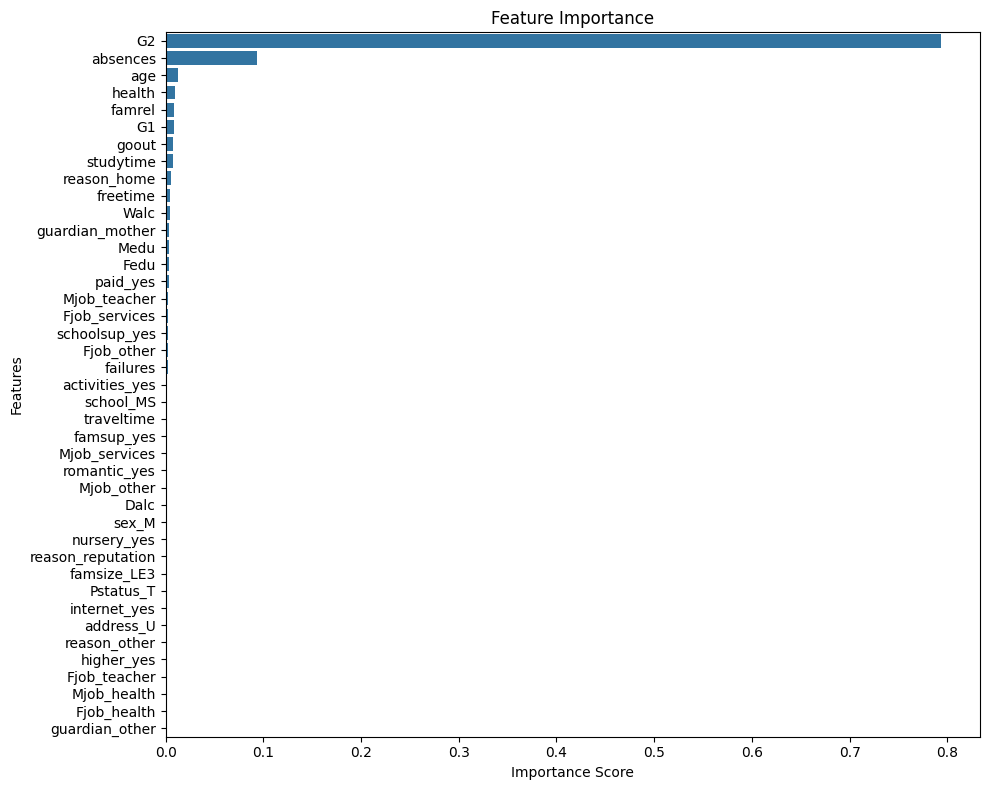

In [49]:
# 중요도를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Tree visualization

In [50]:
from sklearn.tree import plot_tree

In [51]:
# 트리 시각화 (랜덤 포레스트의 첫 번째 트리 선택)
tree = model.estimators_[0]

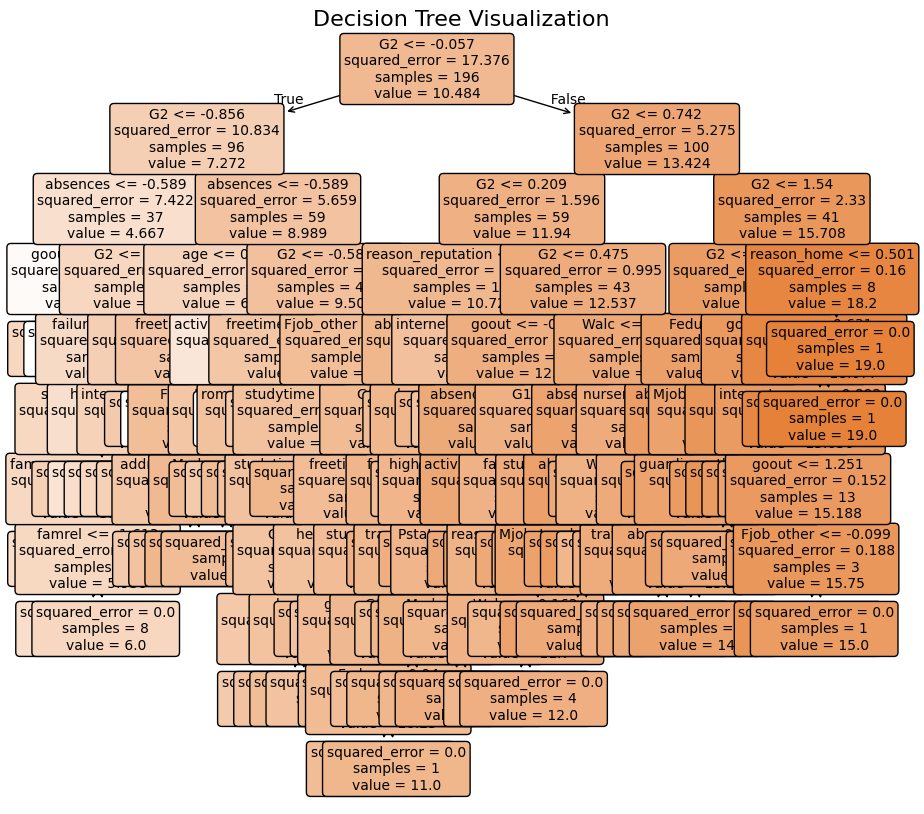

In [52]:
# 트리 시각화
plt.figure(figsize=( 10, 10))
plot_tree(
    tree,
    feature_names=X.columns,  # 특징 이름
    filled=True,              # 색상 채우기
    rounded=True,             # 모서리 둥글게
    fontsize=10               # 폰트 크기
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()